### Problem Definition: Alphabet Recognition

#### Dataset: https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format
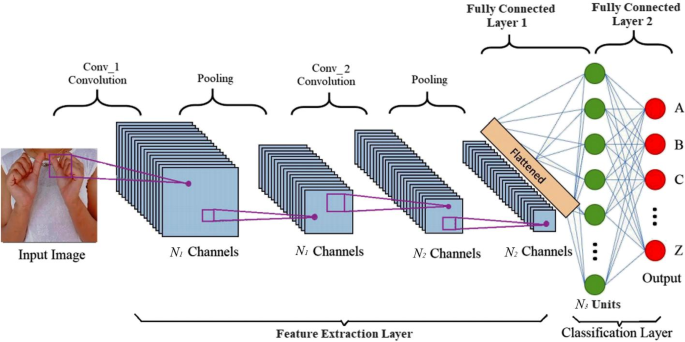


**Presented by:**
   - Divya Mistry
   - Jayoti Thakur
   - Gurnish kaur
   - Shobhit Panwar
   - Pranav Rana
   - Krishaan Banga

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

## Updating width of Jupyter notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
pd.set_option('display.max_colwidth', 2000)
pd.options.display.max_seq_items = 2000
pd.options.display.max_rows = 4000

In [2]:
#pip install emnist

**EMNIST (Extended MNIST)** is a dataset and library that provides access to handwritten character images, including letters, digits, and symbols, with over 800,000 images in total.

In [3]:
from emnist import extract_training_samples, extract_test_samples

X_train, y_train = extract_training_samples('letters')
X_test, y_test = extract_test_samples('letters')

In [4]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   3   4   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  20 109 114  45   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 114 245 253 214   5   0   0   0   0   0  20 100  33   1   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 125 249 254 233  22   0   0   0   0  10 123 238 163  33   0
    0   0   0   2   4   4   0   0   0   0]
 [  0   0   0  82 233 254 251  82   2   0   0   3  79 220 254 244 126   0
    0   0   3  77 125 113   8   0   0   0]
 [  0   0   0  37 217 254 254 128   5   0   0  34 204 254 255 254 216   5
    0  22 154 247 254 253 111   3   0   0]
 [  0   0   0  37 217 254 254 160  16   0   3  84 233 254 255 254 233  22
   10  95 232 254 254 246  77   2   0   0]
 [  0   0   0  39 217 254 254 184  25   0  34 175 251 254 255 25

In [5]:
#print(y_train[0])

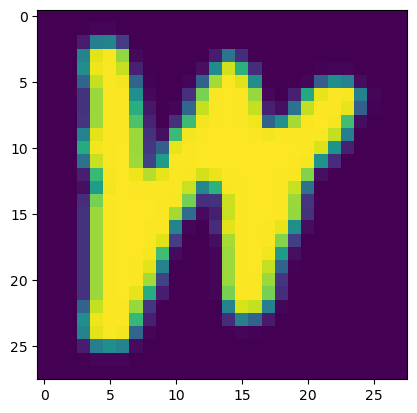

In [6]:
plt.imshow(X_train[0].reshape(28,28)) 

In [7]:
#print(y_train[4])

In [8]:
#plt.imshow(X_train[4].reshape(28,28)) 

In [9]:
X_train.shape

## in the training set we have 124800 images of size 28 x 28.

(124800, 28, 28)

**imshow** is a function in the matplotlib library in Python that displays an image in a plot.

Here we are using imshow to display arrays of pixels as an image in a plot.

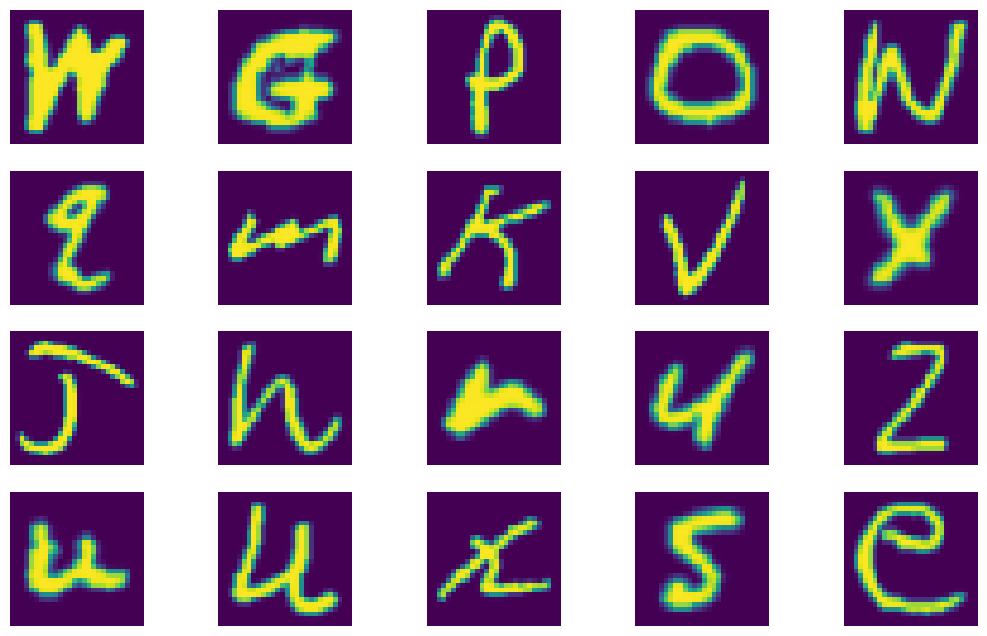

In [10]:
fig = plt.figure(figsize = (13,8))
for i in range(0,20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_train[i].reshape(28,28)) 
    plt.axis('off')



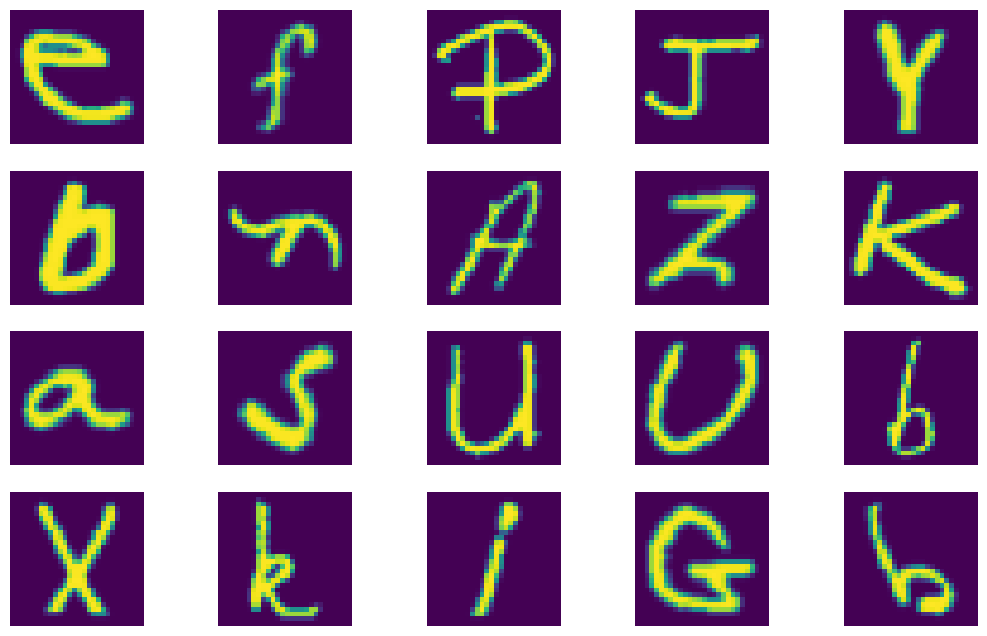

In [11]:
## Picking random images from the dataset.
import random

fig = plt.figure(figsize = (13,8))
for i in range(0,20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_train[i + random.randint(1, X_train.shape[0])].reshape(28,28)) 
    plt.axis('off')

In [12]:
print(y_train)

[23  7 16 ... 13 15 19]


In [13]:
np.unique(y_train, return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=uint8),
 array([4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800,
        4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800,
        4800, 4800, 4800, 4800], dtype=int64))

In [14]:
np.unique(y_test, return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=uint8),
 array([800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800,
        800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800],
       dtype=int64))

In [15]:
## Plotting number of image count per letter

# import string

# #visualize number of  character classes 
# plt.figure(figsize=(15,9))

# # Create a list of the alphabet characters
# alphabet = list(string.ascii_uppercase)

# sns.set(style='whitegrid')
# g = sns.countplot(y_train, palette="icefire")
# plt.title("Distribution of Labels in Classes")


# # Set the tick labels to the alphabet characters
# plt.xticks(range(26),alphabet)
# plt.xlabel(None)


## Importing Tensorflow and related libraries for image processing

In [16]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


In [17]:
from tensorflow.keras.utils import to_categorical

## Normalize the data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

## To categorise with to_categorical index must start with 0
y_train = y_train - 1
y_test = y_test - 1

y_train = to_categorical(y_train,26) # 26 output classes
y_test = to_categorical(y_test,26)

## Reshaping to data to add gray scale to the data
# X_train = np.expand_dims(X_train, axis = -1)
# X_test = np.expand_dims(X_test, axis = -1)

X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

## Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.2, random_state = 51 )

## Data Augmentation
datagen = ImageDataGenerator(
    zoom_range = 0.2,
    shear_range = 0.1,
    rotation_range=30,)

In [18]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [19]:
X_train.shape

(99840, 28, 28, 1)

## Building the CNN

In [20]:
cnn = tf.keras.models.Sequential()

In [21]:
from tensorflow.keras.callbacks import LearningRateScheduler

# define the learning rate range test function
def lr_range_test(epoch, lr):
    return lr * 1.02


In [22]:
## adding 1st convolution layer
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size=3, strides =1, activation = 'relu', input_shape = (28,28,1)))
## adding 1st pooling layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 1))

## adding second layer of convolution layer
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size=3, strides =1, activation = 'relu'))
## adding second layer of pooling layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 1))

## flatting input
cnn.add(tf.keras.layers.Flatten())

## Full Connection
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

## adding dropout layer
cnn.add(tf.keras.layers.Dropout(0.3))

## Output layer
cnn.add(tf.keras.layers.Dense(units = 26, activation = 'softmax'))


## Compiling the CNN

## Try using sparse cross entropy

In [23]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])



In [24]:
## Early stopping to avoid overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [25]:
## add the learning rate range test callback
lr_scheduler = LearningRateScheduler(lr_range_test)

## train the model with the learning rate range test callback
history = cnn.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=50,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, lr_scheduler],
)

# history = cnn.fit(datagen.flow(X_train, y_train, batch_size = 32), epochs = 50 , validation_data = (X_val, y_val), callbacks = [early_stopping])

Epoch 1/50
3120/3120 [==============================] - 154s 49ms/step - loss: 0.8210 - accuracy: 0.7453 - val_loss: 0.2872 - val_accuracy: 0.9005 - lr: 0.0010
Epoch 2/50
3120/3120 [==============================] - 153s 49ms/step - loss: 0.5006 - accuracy: 0.8410 - val_loss: 0.2538 - val_accuracy: 0.9128 - lr: 0.0010
Epoch 3/50
3120/3120 [==============================] - 157s 50ms/step - loss: 0.4405 - accuracy: 0.8593 - val_loss: 0.2587 - val_accuracy: 0.9115 - lr: 0.0011
Epoch 4/50
3120/3120 [==============================] - 152s 49ms/step - loss: 0.4057 - accuracy: 0.8701 - val_loss: 0.2264 - val_accuracy: 0.9207 - lr: 0.0011
Epoch 5/50
3120/3120 [==============================] - 153s 49ms/step - loss: 0.3871 - accuracy: 0.8756 - val_loss: 0.2195 - val_accuracy: 0.9252 - lr: 0.0011
Epoch 6/50
3120/3120 [==============================] - 153s 49ms/step - loss: 0.3719 - accuracy: 0.8808 - val_loss: 0.2279 - val_accuracy: 0.9224 - lr: 0.0011
Epoch 7/50
3120/3120 [==================

In [26]:
cnn.save('Alphabet_Recognizer_32.h5') # with 32 filters

In [27]:
#cnn.save('Alphabet_Recognizer_16.h5') # with 16 filters

In [28]:
# from keras.models import load_model

# cnn = load_model('Alphabet_Recognizer_16.h5')

In [29]:
## Evaluate the model on the test set
test_loss, test_accuracy = cnn.evaluate(X_test, y_test)

650/650 [==============================] - 6s 10ms/step - loss: 0.2572 - accuracy: 0.9226


In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score

# get predictions on the validation set
y_pred = cnn.predict(X_test)

# convert predictions from probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# calculate the confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred)

# calculate the accuracy
acc = accuracy_score(y_test.argmax(axis=1), y_pred)

print("Accuracy:", (acc*100).round(2))


650/650 [==============================] - 6s 10ms/step
Accuracy: 92.26


In [31]:
#pip install gradio

In [32]:
import gradio as gr
from gradio.components import Image, Textbox
import base64
from PIL import Image as pil_image

# Load the pre-trained model
model = tf.keras.models.load_model('Alphabet_Recognizer_32.h5')

# Define the function to be executed
def predict_character(image):
    # preprocess the input image
    img = pil_image.open(image).convert('L').resize((28, 28))
    
    # maximum pixel value
    max_val = 255
    
    complement_img = img.point(lambda x: max_val - x)
    img = np.array(complement_img)
    img = img.reshape((1, 28, 28, 1))
    img = img.astype('float32') / 255.0
    pred = model.predict(img)
    y_pred = np.argmax(pred, axis=1)
    #print(y_pred[0])
    pred_image = np.squeeze(img)
    return chr(y_pred[0] + 65), pred_image


# Define the Gradio interface
inputs = Image(type="filepath", label="Input Image (PNG, Greyscale)")
outputs = [Textbox(label='Predicted Character'), 
           Image(type="numpy", label='Predicted Image')]
interface = gr.Interface(fn=predict_character, inputs=inputs, outputs=outputs, title='Greyscale Alphabet Recognizer')

# Function to encode the image as base64
def encode_image(filepath):
    with open(filepath, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read())
    return encoded_string.decode('utf-8')

# Add the encoded image to the interface
interface.test_input = encode_image('A.jpg')

# Launch the interface
interface.launch()


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [37]:
import gradio as gr
import numpy as np
from tensorflow import keras
from PIL import Image


# Load the pre-trained model
model = keras.models.load_model('Alphabet_Recognizer_32.h5')

# Define the function to be executed
def predict(sketchpad):
    
    if sketchpad is None or not sketchpad.any():
        return "No input provided."
    # preprocess the input image
    
    img = Image.fromarray(sketchpad).convert('L').resize((28, 28))
    img = np.array(img)
    
    # Get the maximum pixel value
    max_val = 255

    # Subtract each pixel value from the maximum value to take the complement
#     img = max_val - img
    
    img = img.reshape((1, 28, 28, 1))
    img = img.astype('float32') / 255.0
    
    # make a prediction using the model
    pred = model.predict(img)
    y_pred = np.argmax(pred, axis=1)

    # return the predicted character label
    return chr(y_pred[0] + 65)

# Define the Gradio interface
gr.Interface(fn=predict, 
             inputs="sketchpad",
             outputs="label",
             live=True).launch()


Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 19ms/step


In [34]:
tn = cm[0, 0]
fp = cm[0, 1:].sum()
fn = cm[1:, 0].sum()
tp = cm[1:, 1:].sum()

# print the number of true positives and true negatives
print("True Positives:", tp)
print("True Negatives:", tn)

True Positives: 19926
True Negatives: 749


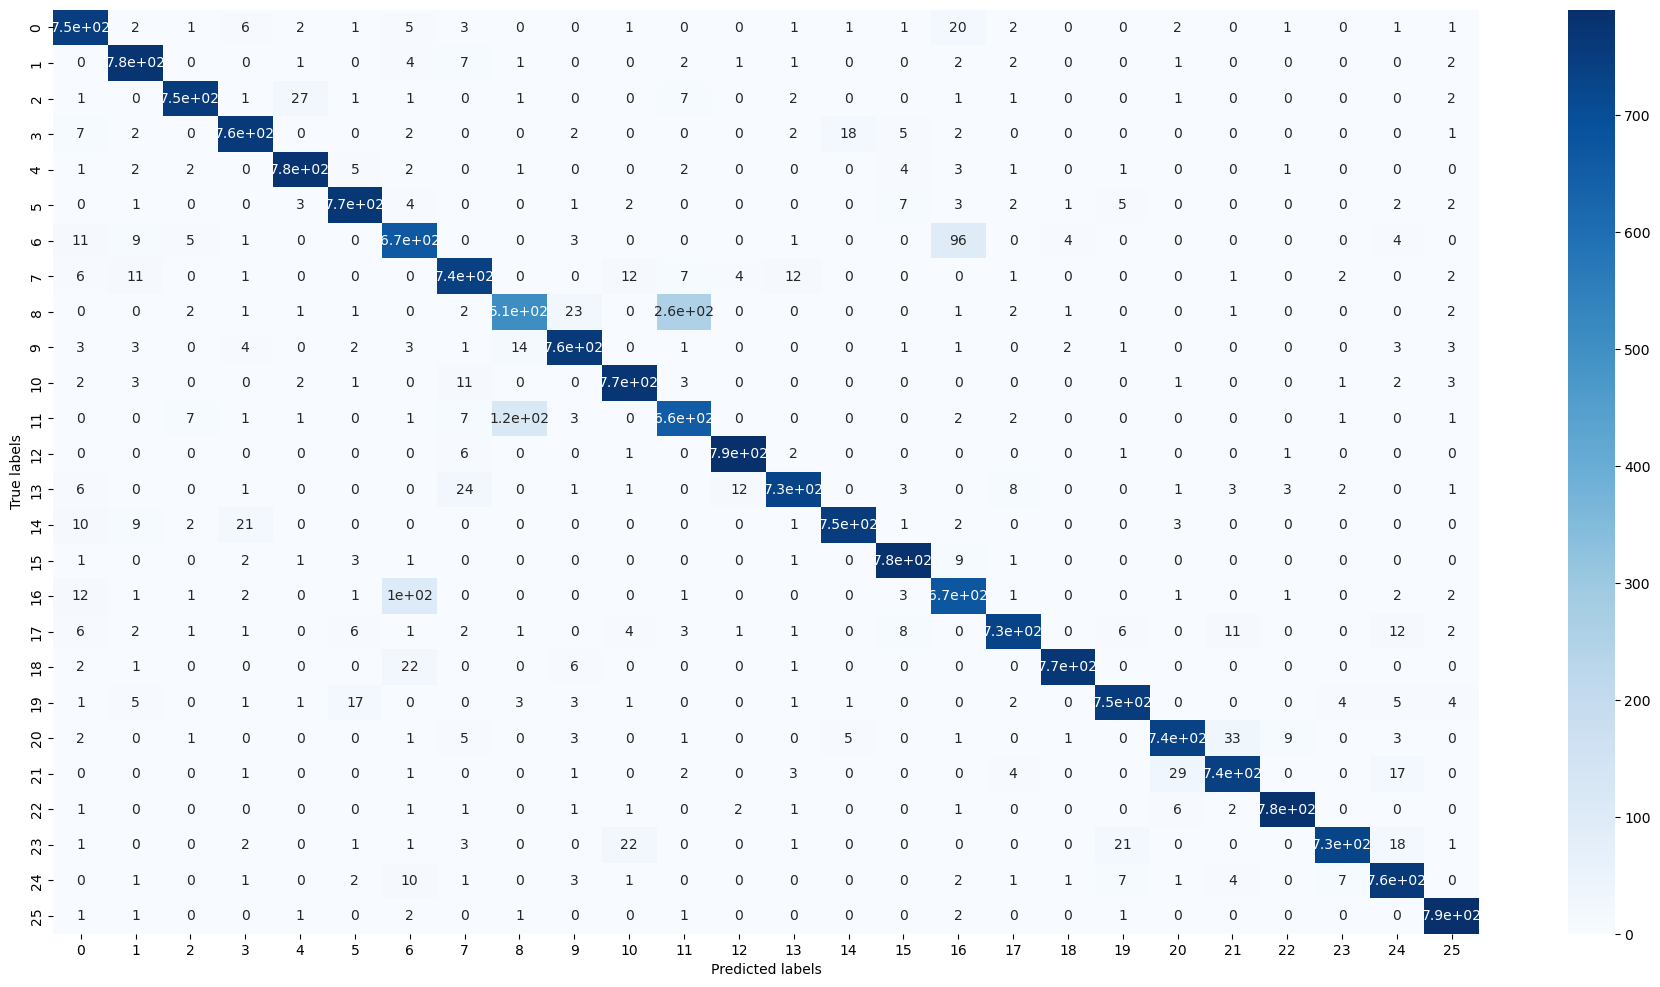

In [35]:
# display the confusion matrix as a heatmap
plt.figure(figsize=(23,12))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# 0-A, 1-B, 3-c, 4-D, 5- E,
#6 -,7,8,9,10,11,
#12,13,14,15,16,17,18,
#19,20,21,22 - W,23 -x,24-Y,25 -z

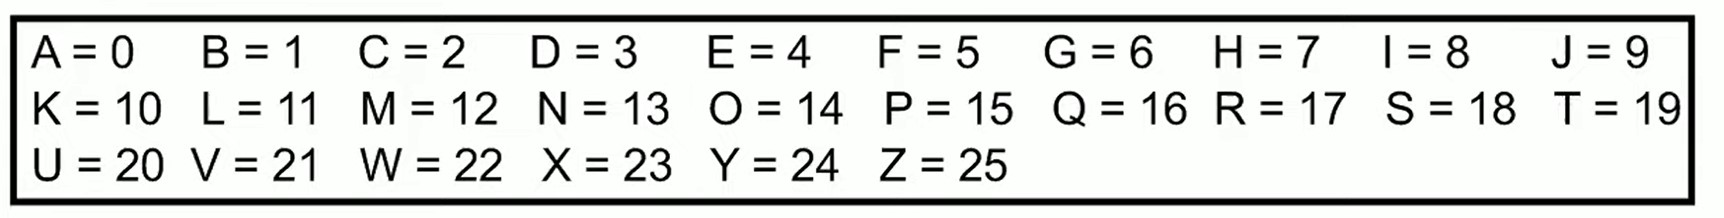